<a href="https://colab.research.google.com/github/LeeJaeEun0/230102_mini_project/blob/main/mask_classification_newdata_230129.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터

참고한 kaggle 주소
https://www.kaggle.com/code/tugrulguner/mask-classification

In [ ]:
# !unzip /content/drive/MyDrive/mask/Medical_mask.zip -d /content/drive/MyDrive/mask/medical_mask # zip  파일

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from keras.applications.inception_v3 import InceptionV3

from keras.applications import MobileNetV2, VGG19, VGG16, Xception, InceptionV3, InceptionResNetV2, DenseNet201
import cv2
import os

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/mask/Medical mask/Medical Mask'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1088.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1089.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1090.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1091.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1092.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1093.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1094.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1095.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1096.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1097.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1098.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1099.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/1101.jpg
/content/drive/MyDrive/mask/Medical mask/Medical Mask/

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/mask/Medical mask/train.csv')
deneme = [1 if ((element=='face_with_mask') or  (element=='mask_surgical') or (element=='mask_colorful')) else 0 for element in data.classname]
data['Classification'] = deneme
data.drop(['x1', 'x2', 'y1', 'y2', 'classname'], axis =1, inplace=True)
data

,name,Classification
0,2756.png,1
1,2756.png,1
2,2756.png,1
3,2756.png,1
4,6098.jpg,0
...,...,...
15407,1894.jpg,1
15408,1894.jpg,1
15409,1894.jpg,0
15410,3216.png,1


In [ ]:
datagrouped = data.groupby(['name'], as_index=False).sum()
datagrouped.Classification[datagrouped['Classification']>=1]=1
datagrouped

<ipython-input-5-d056e7e82dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datagrouped.Classification[datagrouped['Classification']>=1]=1


,name,Classification
0,1801.jpg,0
1,1802.jpg,1
2,1803.jpg,1
3,1804.jpg,1
4,1805.jpg,1
...,...,...
4321,6431.png,1
4322,6432.jpg,1
4323,6433.png,1
4324,6434.jpg,1


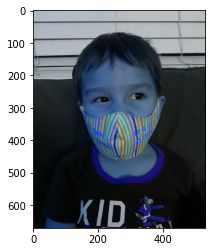

In [ ]:
path = '/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/'
rre = cv2.imread(path+'3216.png')
plt.imshow(rre)

In [ ]:
path = '/content/drive/MyDrive/mask/Medical mask/Medical Mask/images/'
trainingdata = np.zeros((1,256,256,3))
k = 0
for element in datagrouped['name']:
    resim = cv2.imread(path+element)
    resim = cv2.resize(resim,(256,256), interpolation = cv2.INTER_NEAREST)
    resim = (resim-np.mean(resim))/np.std(resim)
    trainingdata = np.append(trainingdata, resim[np.newaxis,...], axis=0) 
    if k==1200:
        break
    k+=1

In [ ]:
ag = np.delete(trainingdata,0, axis=0)
ag.shape

(1201, 256, 256, 3)

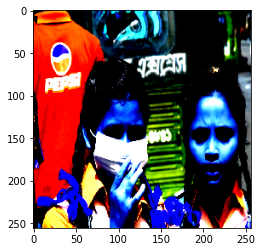

In [ ]:
plt.imshow(ag[25,...])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


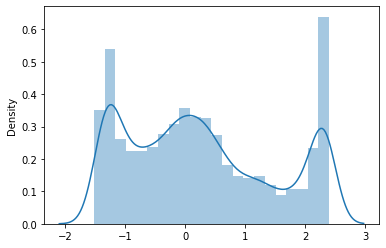

In [ ]:
sns.distplot(ag[25,125:225,50:150,0])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


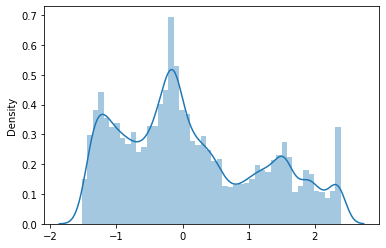

In [ ]:
sns.distplot(ag[25,...,0])

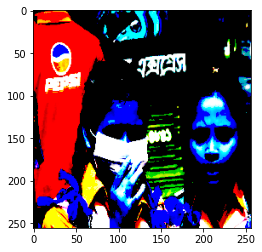

In [ ]:
plt.imshow(ag[25,...]*(ag[25,...]>0.6))

In [ ]:
trainingdata[1000:1500,...].shape

(202, 256, 256, 3)

In [ ]:
labeldata = datagrouped.Classification[:1201]
labeldata

0       0
1       1
2       1
3       1
4       1
       ..
1196    1
1197    1
1198    1
1199    1
1200    1
Name: Classification, Length: 1201, dtype: int64

In [ ]:
input_layer = tf.Input(shape=(256, 256, 3))
model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in model.layers[:-8]:
    layer.trainable = False
x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(input_layer)
x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(128,(3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = tf.layers.BatchNormalization()(x)
x = tf.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
x = tf.layers.Dropout(0.5)(x)
x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
x = tf.layers.BatchNormalization()(x)
#x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(256,(3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = tf.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(x)
x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(x)
x = tf.layers.BatchNormalization()(x)
#x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(512,(3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = tf.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
#x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
x = tf.layers.Dropout(0.5)(x)
#x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(64,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.BatchNormalization()(x)
#x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(32,(3, 3), strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(256,(3, 3), padding='same', strides=(1, 1), activation='relu')(x)
#x = tf.layers.MaxPool2D((2, 2), padding='same', strides=(1, 1))(x)
#x = tf.layers.BatchNormalization()(x)
#x = tf.layers.Conv2D(256, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(256, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
#x = tf.layers.MaxPool2D((2, 2), padding='same', strides=(1, 1))(x)
#x = tf.layers.Conv2D(256, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(256, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
#x = tf.layers.MaxPool2D((2, 2), padding='same', strides=(1, 1))(x)
#x = tf.layers.Conv2D(256, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
#x = tf.layers.Conv2D(256, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
#x = tf.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
#x = tf.layers.Dropout(0.5)(x)
x = tf.layers.Conv2D(16, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
x = tf.layers.Conv2D(16, (1, 1), strides=(2, 2), activation='relu')(x)
x = tf.layers.BatchNormalization()(x)
#x = tf.layers.Conv2D(1, (3, 3), strides=(2, 2), activation='relu')(x)
#x = tf.layers.MaxPool2D((2, 2), padding='same', strides=(1, 1))(x)
#x = tf.layers.GlobalMaxPooling2D()(x)
#x = tf.layers.BatchNormalization()(x)
#x = tf.layers.Lambda(lambda x: x**2)(x)
x = tf.layers.Flatten()(x)
#x = tf.layers.GlobalAveragePooling2D()(x)
#x = tf.layers.Dense(1024, activation='relu')(x)
#x = tf.layers.Dense(2048, activation='relu')(x)
#x = tf.layers.Dense(1024, activation='relu')(x)
x = tf.layers.Dense(128, activation='relu')(x)
x = tf.layers.Dense(256, activation='relu')(x)
x = tf.layers.Dense(128, activation='relu')(x)
x = tf.layers.Dense(1, activation='sigmoid')(x)
cmodel = tf.Model(input_layer, x)
cmodel.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                              

In [ ]:
# m선언된 부분을 찾을 수 없음



test_loss, test_acc = m.evaluate(ag[1000:1200,...],labeldata[1000:1200])

NameError: ignored

In [ ]:
labeldata[1200:1210]

1200    1
Name: Classification, dtype: int64

In [ ]:
ag[1000:1200].shape

(200, 256, 256, 3)